17.22562047142633
[[268 199]
 [228 104]
 [312 300]
 [138 227]
 [402 177]
 [179 331]
 [361  73]
 [100 134]
 [440 270]]


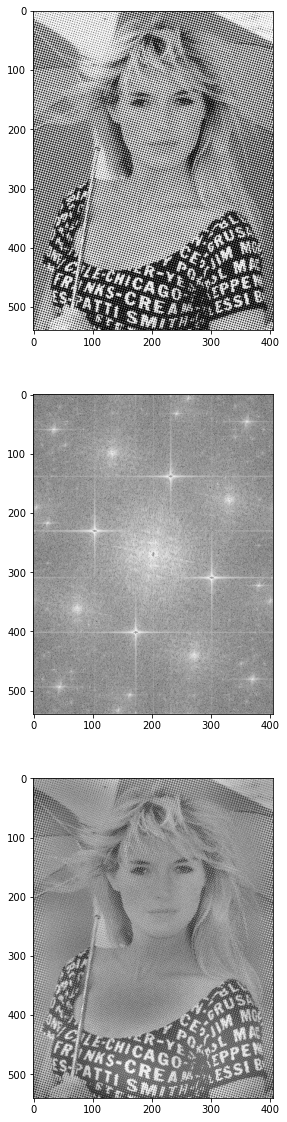

In [179]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
import random
import scipy
from scipy import ndimage, misc
from skimage.feature import peak_local_max
from PIL import Image, ImageEnhance
def minimumBoxFilter(n, img):
    size = (n, n)
    shape = cv2.MORPH_RECT
    kernel = cv2.getStructuringElement(shape, size)
    imgResult = cv2.erode(img, kernel)
    return imgResult
def fft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)
def ifft(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real
img=cv2.imread('gray1.jpg',cv2.IMREAD_GRAYSCALE)
f, ax = plt.subplots(3,1,figsize=(20,20))
ax[0].imshow(img,cmap='gray')
imgfft=fft(img)
print(np.max(np.log(abs(imgfft))))
imgfft=np.log(imgfft)
imgfftimag=(1j*imgfft.imag).astype(complex)
imgfft=imgfft.real
imgfft[(np.max(imgfft-4))<imgfft]=np.median(imgfft)
imgfft=minimumBoxFilter(1,imgfft)
print(peak_local_max(imgfft, min_distance=60))
imgfft[peak_local_max(imgfft)]=imgfft[peak_local_max(imgfft)]-0.9
imgfft=(imgfft+imgfftimag).astype(complex)
ax[1].imshow(abs(imgfft),cmap='gray')
imgfft=np.exp(imgfft)
img2=ifft(imgfft)
alpha = 1.5 # Contrast control (1.0-3.0)
beta = 150 # Brightness control (0-100)
img2=cv2.convertScaleAbs(img2, alpha=alpha, beta=beta)
ax[2].imshow(img2,cmap='gray')

[[403 282]
 [576 355]
 [238 217]
 [273 312]
 [541 260]
 [309 404]
 [505 168]
 [370 192]
 [444 380]
 [140 335]
 [674 237]
 [371 380]
 [443 192]
 [105 244]
 [709 328]
 [177 428]
 [637 144]
 [478 474]
 [336  98]
 [336 473]
 [478  99]]
[[309 355]
 [505 217]
 [312 217]
 [502 355]
 [403 287]
 [212 148]
 [602 424]
 [504 492]
 [310  80]
 [674 237]
 [140 335]
 [114 217]
 [700 355]
 [114  73]
 [700 499]
 [114 503]
 [700  69]]
[[409 283]
 [505 218]
 [309 354]
 [503 355]
 [311 217]
 [269 285]
 [545 287]
 [406 383]
 [408 189]
 [407 480]
 [407  92]
 [310 120]
 [504 452]
 [171 217]
 [643 355]
 [505 121]
 [309 451]
 [171 354]
 [643 218]
 [683 287]
 [131 285]]


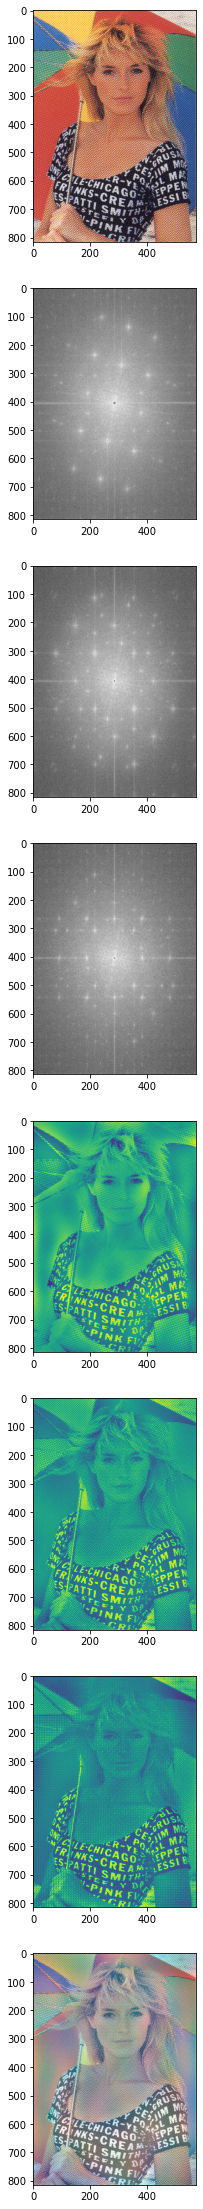

In [200]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
import random
import scipy
from scipy import ndimage, misc
from skimage.feature import peak_local_max
from PIL import Image, ImageEnhance
def minimumBoxFilter(n, img):
    size = (n, n)
    shape = cv2.MORPH_RECT
    kernel = cv2.getStructuringElement(shape, size)
    imgResult = cv2.erode(img, kernel)
    return imgResult
def fft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)
def ifft(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real
img=cv2.imread('FalseMoire.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
f, ax = plt.subplots(8,1,figsize=(40,40))
ax[0].imshow(img)
img=np.rint(img)
img=img.astype(np.float64)
img2=np.zeros_like(img).astype(np.float64)
for i in range(0,3):
    imgfft=fft(img[:,:,i])
    imgfft=np.log(imgfft)
    imgfftimag=(1j*imgfft.imag).astype(complex)
    imgfft=imgfft.real
    if i==0:
        ln=(np.max(imgfft-4))
        md=np.median(imgfft)
    imgfft[ln<imgfft]=md
    imgfft=minimumBoxFilter(1,imgfft)
    print(peak_local_max(imgfft, min_distance=60))
    imgfft[peak_local_max(imgfft)]=imgfft[peak_local_max(imgfft)]-0.9
    imgfft=(imgfft+imgfftimag).astype(complex)
    ax[i+1].imshow(abs(imgfft),cmap='gray')
    imgfft=np.exp(imgfft)
    img2[:,:,i]+=ifft(imgfft).astype(np.float64)

alpha = 2 # Contrast control (1.0-3.0)
beta = 150 # Brightness control (0-100)
img2=cv2.convertScaleAbs(img2, alpha=alpha, beta=beta)
ax[4].imshow(img2[:,:,0])
ax[5].imshow(img2[:,:,1])
ax[6].imshow(img2[:,:,2])
ax[7].imshow(img2)